Here's an example of a dimension reduction technique, t-distributed stochastic neighborhood embedding (t-SNE).

Similar to principle component analysis, but does a better job of preserving local structure, very good for nonlinear relationships and exploratory data analysis.

Let's do a sanity check on the dataset, we should have equal numbers of Jolie and Washington images.

In [1]:
import os
"""
j_num = ...
w_num = ...

assert ...

n_images = ...
"""

This is an interesting example, we'll be pulling down a pretrained Resnet18 model and extract the output before classification.

This will produce a high dimensional feature vector for each image, which we'll try to use to cluster images for facial recognition.

In [2]:
from torchvision import models

"""
model = ...
model. ...
"""

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Resnet requires some preprocessing of the images, so we'll use the torchvision.transforms module to do this.

In [3]:
from torchvision import transforms

"""
preprocess = transforms.Compose([
    ...,
])
"""

We'll place a hook on the forward pass of the model to extract the feature vector.

Note, when this hook is called, there will already exist a dictionary named `activation` in the namespace, which we'll store the feature vector in.

In [4]:
"""
def ...:
    def ...:
        ...
    return ...
"""

This won't be useful for this workshop, because of how TensorBoard works, but if you want to run this example locally then this will let you visualize the structure of the network.

In [5]:
from torch.utils.tensorboard import SummaryWriter
from PIL import Image

writer = SummaryWriter('runs/plot')

test_image = Image.open('./data/Angelina Jolie/001_fe3347c0.jpg')
writer.add_graph(model, preprocess(test_image).unsqueeze(0))


In [6]:
import torch

Let's begin feeding images to the model.

First, Angelina Jolie.

In [7]:
jolie = []

"""
for ... in ...:
    activation = {}
    
    input_image = ...
    
    input_tensor = ...
    
    input_batch = ...
    
    h = ...
    
    if torch.cuda.is_available():
        ...
    
    with ...:
        output = ...
    
    r = ...
    
    jolie.append(...)
"""


/home/ben/venvs/py311/lib/python3.11/site-packages/torch/cuda/__init__.py:128: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


Then Denzel Washington.

In [8]:
washington = []

"""
for ... in ...:
    activation = {}
    
    input_image = ...
    
    input_tensor = ...
    
    input_batch = ...
    
    h = ...
    
    if torch.cuda.is_available():
        ...
    
    with ...:
        output = ...
    
    r = ...
    
    washington.append(...)
"""

Let's pull in a K-means algorithm from Scikit-learn to cluster the images.

In [9]:
from sklearn.cluster import KMeans

"""
faces = ...
labels = ...

kmeans = KMeans(..., ...).fit(...)
predlabels = ...

jolie_centroid = ...
washginton_centroid = ...
"""

Now let's look at the test images, and extract the feature vectors for Angelina Jolie.

In [10]:
jolie_test = []

"""
for ... in ...:
    activation = ...
    
    input_image = ...
    input_tensor = ...
    input_batch = ...
    
    h = ...
    
    if torch.cuda.is_available():
        ...
    
    with ...:
        output = ...
    
    r = ...
    jolie_test.append(...)
"""

Same for the Denzel Washington test images.

In [11]:
washington_test = []

"""
for ... in ...:
    activation = ...
    
    input_image = ...
    input_tensor = ...
    input_batch = ...
    
    h = ...
    
    if torch.cuda.is_available():
        ...
    
    with ...:
        output = ...
    
    r = ...
    washington_test.append(...)
"""

Let's check how many were correctly classified.

In [19]:
import numpy as np

"""
n_correct = ...
print(n_correct)
"""

7


We can see the model doesn't do a perfect job.

Let's see which images were misclassified for Angelina Jolie.

In [13]:
"""
for ..., ... in enumerate(...):
    d_jolie = ...
    d_washington = ...
    
    if ... < ...:
        ...
    else:
        ...
"""



Angelina Jolie Test 1
Image name: jolie_test_3.jpg

Predicted: Denzel Washington

Angelina Jolie Test 2
Image name: jolie_test_2.jpg

Predicted: Denzel Washington

Angelina Jolie Test 3
Image name: jolie_test_4.jpg

Predicted: Denzel Washington

Angelina Jolie Test 4
Image name: jolie_test_5.jpg

Predicted: Angelina Jolie

Angelina Jolie Test 5
Image name: jolie_test_1.jpg

Predicted: Denzel Washington


And we'll do the same for Denzel Washington.

In [14]:
"""
for ..., ... in enumerate(...):
    d_jolie = ...
    d_washington = ...
    
    if ... < ...:
        ...
    else:
        ...
"""


Denzel Washington Test 1
Image name: washington_test_3.jpg

Predicted: Angelina Jolie

Denzel Washington Test 2
Image name: washington_test_5.jpg

Predicted: Angelina Jolie

Denzel Washington Test 3
Image name: washington_test_4.jpg

Predicted: Angelina Jolie

Denzel Washington Test 4
Image name: washington_test_2.jpg

Predicted: Angelina Jolie

Denzel Washington Test 5
Image name: washington_test_1.jpg

Predicted: Angelina Jolie


Now we'll do some spiffy TSNE dimension reduction, which is similar to PCA.

In [15]:
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

def tsne(faces, labels):
    faces_emb = TSNE(n_components=2, learning_rate='auto',
                     init='random', perplexity=3).fit_transform(np.asarray(faces))

    df = pd.DataFrame()
    df['y'] = ['Jolie' if i == 1 else 'Washington' for i in labels]
    df['comp-1'] = faces_emb[:, 0]
    df['comp-2'] = faces_emb[:, 1]

    sns.scatterplot(x='comp-1', y='comp-2', hue=df.y.tolist(),
                    palette=sns.color_palette('hls', 3), data=df).set(title='T-SNE of Face Embeddings')
    plt.show()


/home/ben/.apptainer_cache/ipykernel_84752/4041053363.py:16: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x='comp-1', y='comp-2', hue=df.y.tolist(),


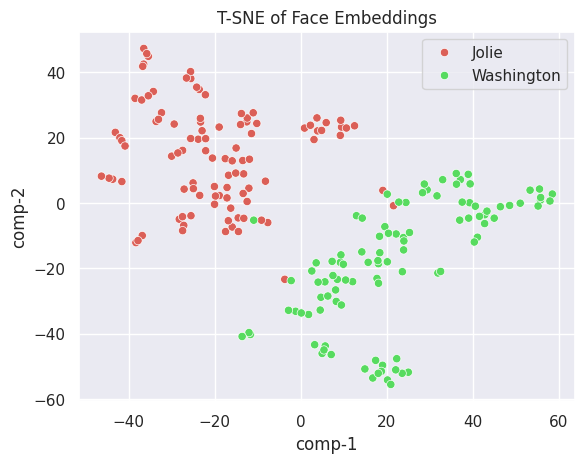

In [16]:
tsne(faces, labels)

Now we can go through the training dataset and see which images were misclasified.

In [17]:
correctly_classified = (predlabels == labels)

In [18]:
for count, value in enumerate(correctly_classified):
    if value == False:
        print(f'\nImage {count} was incorrectly classified')
        if count > n_images:
            print('It was a Washington image')
            print(
                f'Image name: {os.listdir("./data/Denzel Washington")[count-n_images]}')
        else:
            print('It was a Jolie image')
            print(f'Image name: {os.listdir("./data/Angelina Jolie")[count-1]}')




Image 0 was incorrectly classified
It was a Jolie image
Image name: 080_e998ab00.jpg

Image 1 was incorrectly classified
It was a Jolie image
Image name: 044_512dfd33.jpg

Image 2 was incorrectly classified
It was a Jolie image
Image name: 060_4037f0f7.jpg

Image 3 was incorrectly classified
It was a Jolie image
Image name: 064_0de68937.jpg

Image 4 was incorrectly classified
It was a Jolie image
Image name: 008_d1f87068.jpg

Image 5 was incorrectly classified
It was a Jolie image
Image name: 029_f2882b0d.jpg

Image 6 was incorrectly classified
It was a Jolie image
Image name: 087_f325890f.jpg

Image 7 was incorrectly classified
It was a Jolie image
Image name: 075_4c504eec.jpg

Image 8 was incorrectly classified
It was a Jolie image
Image name: 004_f61e7d0c.jpg

Image 9 was incorrectly classified
It was a Jolie image
Image name: 025_41cee764.jpg

Image 10 was incorrectly classified
It was a Jolie image
Image name: 074_0ec79719.jpg

Image 11 was incorrectly classified
It was a Jolie i